# The prediction of application popularity based on features identified in App Store data

## Data Preprocessing

Dataset acquired from Kaggle - https://www.kaggle.com/lava18/google-play-store-apps

### Techniques and tasks carried out to clean/improve quality of data

- Removed additional or unecessary data columns such as genre, size, version history etc.
- Removed duplicates
- Alter Installs and Price features to clean attributes as integers and floats, respectively.
    - Initial Installs values were 1+, 5,000+, 1,000,000+ etc. Removed '+' symbol 
    - Initial Price values had '$' currency symbol, this was also removed

- Missing values were replaced, a number of Ratings appeared as NaN - the mean rating for the entire set was used as a replacement.
    - 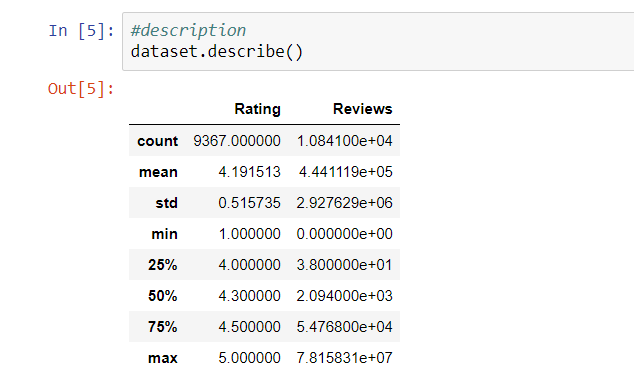
        - Inital data statistics, before pre-processing

- Remove non-english or invalid named apps such as - ä¸­å›½èªž AQãƒªã‚¹ãƒ‹ãƒ³ã‚° (reference: https://www.dataquest.io/blog/basic-data-science-portfolio-project-tutorial/)
    - Removal of these apps is to focus on the more valuable data as well as to begin balancing the data as it is quite skewed

- Further entries were removed from the dataset to reduce the skew/overfitting of some data.
    - For example, the installs for ranges 1,000, 10,000, 100,000 were vastly greater than other ranges. (thousands of entries as opposed to tens/hundreds)
    - Similarly, the FAMILY, GAMES, TOOLS categories had much more entries, as did free apps rather than paid.
    - Reducing the amounts of the entries with the attributes was done by foucsing removing entries with 2 or more of these attributes.
        - i.e. A free app in the FAMILY category with 10,000 downloads would be a good choice to remove.

   - Attention was also paid to the rating and number of reviews etc. as these attributes were also imbalanced.
    
        - 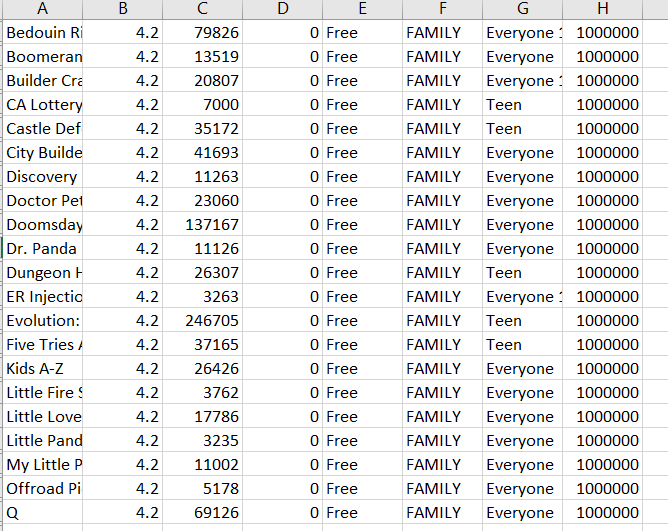
            - Sample of removal criteria/filter

## Data Analysis

### Load libraries

In [1]:
#Load libraries
import pandas
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [2]:
filename = "googleplaystore.csv"
names = ['Name', 'Reviews', 'Price', 'Type', 'Category', 'ContentRating', 'Rating', 'Installs']
dataset = read_csv(filename, names=names)

In [3]:
# Find any null values
# https://www.kaggle.com/youhanlee/would-it-be-possible-to-predict-success-of-app#5.-Success-prediction
dataset.isnull().sum()

Name             0
Reviews          0
Price            0
Type             0
Category         0
ContentRating    0
Rating           0
Installs         0
dtype: int64

Null entry was found in the dataset, googled name of application and added Category & Genre, based on result (Photography)

### Data Descriptions

In [4]:
print(dataset.shape)

(9186, 8)


In [5]:
#datatype
print(dataset.dtypes)

Name              object
Reviews            int64
Price            float64
Type              object
Category          object
ContentRating     object
Rating           float64
Installs           int64
dtype: object


In [6]:
dataset.head(10)

,Name,Reviews,Price,Type,Category,ContentRating,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,0.00,Free,ART_AND_DESIGN,Everyone,4.1,10000
1,10 Best Foods for You,2490,0.00,Free,HEALTH_AND_FITNESS,Everyone 10,4.0,500000
2,10 WPM Amateur ham radio CW Morse code trainer,10,1.49,Paid,COMMUNICATION,Everyone,3.5,100
3,"10,000 Quotes DB (Premium)",70,0.99,Paid,BOOKS_AND_REFERENCE,Everyone,4.1,500
4,100 C Programs,20,0.00,Free,FAMILY,Everyone,4.2,5000
5,100 Doors of Revenge,105766,0.00,Free,FAMILY,Teen,4.1,10000000
6,"100000 Messages - DP, Status, Jokes & GIF 2018",121,0.00,Free,LIFESTYLE,Mature 17,3.7,10000
7,101 C Programming Problems,498,0.00,Free,FAMILY,Everyone,4.6,50000
8,"104 Looking for a job - looking for a job, loo...",74359,0.00,Free,BUSINESS,Everyone,4.4,1000000
9,11st,48732,0.00,Free,SHOPPING,Everyone,3.8,10000000


In [7]:
#distribution
print(dataset.groupby('Rating').size())

Rating
1.0      15
1.2       1
1.4       2
1.5       3
1.6       4
1.7       8
1.8       8
1.9      12
2.0      12
2.1       6
2.2      14
2.3      20
2.4      17
2.5      19
2.6      24
2.7      22
2.8      39
2.9      42
3.0      80
3.1      67
3.2      59
3.3      91
3.4     123
3.5     152
3.6     161
3.7     214
3.8     263
3.9     341
4.0     495
4.1     599
4.2    2167
4.3     816
4.4     826
4.5     819
4.6     652
4.7     424
4.8     217
4.9      81
5.0     271
dtype: int64


In [8]:
#distribution
print(dataset.groupby('Installs').size())

Installs
0               14
1               66
5               81
10             383
50             204
100            703
500            326
1000           838
5000           462
10000          956
50000          464
100000         988
500000         502
1000000       1234
5000000        604
10000000       931
50000000       200
100000000      187
500000000       24
1000000000      19
dtype: int64


In [9]:
#distribution
print(dataset.groupby('Category').size())

Category
ART_AND_DESIGN           63
AUTO_AND_VEHICLES        84
BEAUTY                   53
BOOKS_AND_REFERENCE     220
BUSINESS                417
COMICS                   54
COMMUNICATION           310
DATING                  169
EDUCATION               118
ENTERTAINMENT           101
EVENTS                   64
FAMILY                 1621
FINANCE                 338
FOOD_AND_DRINK          109
GAME                    832
HEALTH_AND_FITNESS      287
HOUSE_AND_HOME           72
LIBRARIES_AND_DEMO       82
LIFESTYLE               362
MAPS_AND_NAVIGATION     127
MEDICAL                 390
NEWS_AND_MAGAZINES      250
PARENTING                60
PERSONALIZATION         367
PHOTOGRAPHY             279
PRODUCTIVITY            371
SHOPPING                201
SOCIAL                  237
SPORTS                  318
TOOLS                   774
TRAVEL_AND_LOCAL        217
VIDEO_PLAYERS           160
WEATHER                  79
dtype: int64


In [10]:
#statistics
dataset.describe()

,Reviews,Price,Rating,Installs
count,9.186000e+03,9186.000000,9186.000000,9.186000e+03
mean,2.250964e+05,1.059836,4.177487,8.017631e+06
std,1.874192e+06,16.267800,0.497338,5.410636e+07
min,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.225000e+01,0.000000,4.000000,1.000000e+03
50%,8.890000e+02,0.000000,4.200000,1.000000e+05
75%,2.998750e+04,0.000000,4.500000,1.000000e+06
max,7.812821e+07,400.000000,5.000000,1.000000e+09



### Clean categories into integer to perform analysis
##### Based on Kernel from Kaggle
##### Ref - https://www.kaggle.com/jemseow/machine-learning-to-predict-app-ratings
"integer encoding relies on the fact that there's a relationship between each category(e.g. think age range vs types of animals)"

In [11]:
#Cleaning Categories into integers
CategoryString = dataset["Category"]
categoryVal = dataset["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
dataset["Category"] = dataset["Category"].map(category_dict).astype(int)

In [12]:
#Similarly clean 'Type' (free/paid) into integers/binary

def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

dataset['Type'] = dataset['Type'].map(type_cat)

In [13]:
#Cleaning of content rating classification
RatingL = dataset['ContentRating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
dataset['ContentRating'] = dataset['ContentRating'].map(RatingDict).astype(int)

In [14]:
#datatype
print(dataset.dtypes)

Name              object
Reviews            int64
Price            float64
Type               int64
Category           int64
ContentRating      int64
Rating           float64
Installs           int64
dtype: object



Altered data types of data in the set.
Only changed the relevant ones, some unnecessary, such as Name, Size and Genre (category can cover this aspect)


In [15]:
#statistics
dataset.describe()

,Reviews,Price,Type,Category,ContentRating,Rating,Installs
count,9.186000e+03,9186.000000,9186.000000,9186.000000,9186.000000,9186.000000,9.186000e+03
mean,2.250964e+05,1.059836,0.080231,11.404964,0.363923,4.177487,8.017631e+06
std,1.874192e+06,16.267800,0.271665,7.847620,0.831498,0.497338,5.410636e+07
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.225000e+01,0.000000,0.000000,4.000000,0.000000,4.000000,1.000000e+03
50%,8.890000e+02,0.000000,0.000000,9.000000,0.000000,4.200000,1.000000e+05
75%,2.998750e+04,0.000000,0.000000,16.000000,0.000000,4.500000,1.000000e+06
max,7.812821e+07,400.000000,1.000000,32.000000,5.000000,5.000000,1.000000e+09


### Data Visualisation

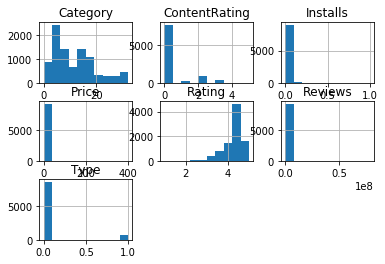

In [16]:
#histograms
dataset.hist()
pyplot.show()

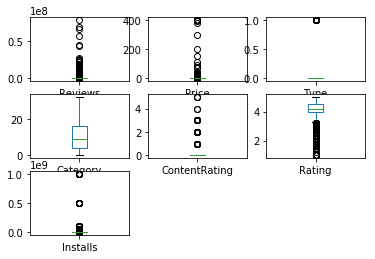

In [17]:
#box/whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

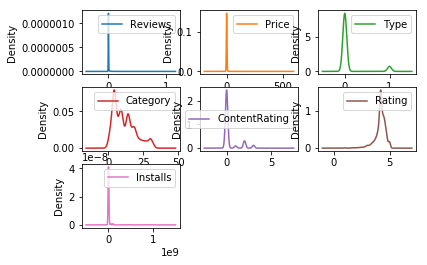

In [18]:
#density plots
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

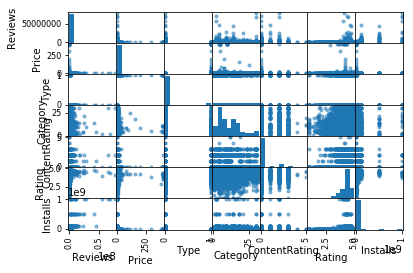

In [19]:
#scatter matrix
scatter_matrix(dataset)
pyplot.show()

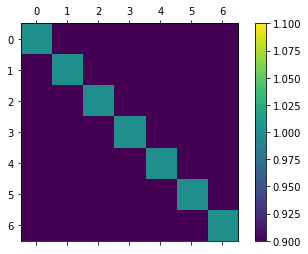

In [20]:
#correlation matrix
correlations = dataset.corr()

#plot corr matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=1, vmax=1)
fig.colorbar(cax)

pyplot.show()

In [21]:
#Pearson Correlations
correlations = dataset.corr(method='pearson')
print(correlations)

                Reviews     Price      Type  Category  ContentRating  \
Reviews        1.000000 -0.007707 -0.034083  0.007767       0.049353   
Price         -0.007707  1.000000  0.220598 -0.026460      -0.014635   
Type          -0.034083  0.220598  1.000000 -0.067382      -0.041552   
Category       0.007767 -0.026460 -0.067382  1.000000       0.064357   
ContentRating  0.049353 -0.014635 -0.041552  0.064357       1.000000   
Rating         0.054616 -0.016160  0.040365 -0.002562       0.010441   
Installs       0.628313 -0.009625 -0.043348  0.015800       0.041652   

                 Rating  Installs  
Reviews        0.054616  0.628313  
Price         -0.016160 -0.009625  
Type           0.040365 -0.043348  
Category      -0.002562  0.015800  
ContentRating  0.010441  0.041652  
Rating         1.000000  0.039157  
Installs       0.039157  1.000000  


Correlation of note - relation between installs and reviews (more downloads, more reviews, makes sense)

Price - Negative correlations here may be due to a less installs of paid apps, meaning less reviews, ratings etc.
Obviously a correlation between price and type (free/paid), however not as strong as might be expected.

In [22]:
#Data Skew
skew = dataset.skew()
print(skew)

Reviews          26.015351
Price            23.250039
Type              3.091018
Category          0.798153
ContentRating     2.102416
Rating           -1.893534
Installs         14.823462
dtype: float64


Skews are quite large/significant in the dataset. However, little cleaning can be performed as it greatly reduces the size of the dataset. 

Skew values shown above are those after more cleaning was performed.

Initial skews as follows:

- Rating           -1.920650
- Reviews          26.570960
- Price            23.813281
- Type              3.141935
- Category          0.857864 
- ContentRating     2.093900
- Installs         15.030577


## Prediction Modelling

### Prediction #1

The following analysis was performed with the aim of predicting the number of downloads an app would recieve. However, results were poor and further experiments were carried out, later in the notebook, based on this.

##### Creating the models

In [23]:
#Create validation dataset - Split train/test
array = dataset.values
X = array[:, 1:7]
Y = array[:, 7]

# Error - Unknown label type: 'unknown' (https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown)
Y = Y.astype('float')

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [24]:
#Build/Check models

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [25]:
#Evaluate models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = "{0}: {1}, ({2})" .format(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.4217436838495616, (0.015417994002314911)
CART: 0.4142575395280728, (0.012931661836107266)
SVM: 0.30906077962520156, (0.014561399889159714)


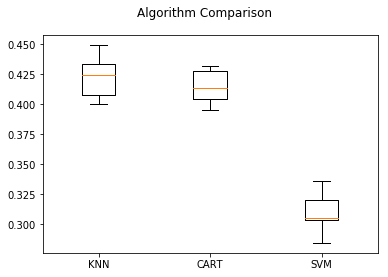

In [26]:
#Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

pyplot.show()

Accuracy results have been poor for this attempt of prediction, following consideration it was decided to try another attribute for prediction (demonstrated in the next section).

### Prediction #2

This section uses a copy of the previous dataset, to utilise the Rating attribute for prediction. Detailed in the accompanying document are papers which have attempt similar work to this, using the Rating, and have been successful.

In [27]:
filename = "googleplaystore1.csv"
names = ['Name', 'Reviews', 'Price', 'Type', 'Category', 'ContentRating', 'Installs', 'Rating']
dataset = read_csv(filename, names=names)

In [28]:
print(dataset.shape)

(9186, 8)


This code section, cleans some attributes into integers, as seen previously

In [29]:
#Cleaning Categories into integers
CategoryString = dataset["Category"]
categoryVal = dataset["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
dataset["Category"] = dataset["Category"].map(category_dict).astype(int)

In [30]:
#Similarly clean 'Type' (free/paid) into integers/binary

def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

dataset['Type'] = dataset['Type'].map(type_cat)

In [31]:
#Cleaning of content rating classification
RatingL = dataset['ContentRating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
dataset['ContentRating'] = dataset['ContentRating'].map(RatingDict).astype(int)

##### Creating the models

In [32]:
#Create validation dataset - Split train/test
array = dataset.values
X = array[:, 1:7]
Y = array[:, 7]

# Error - Unknown label type: 'continuous' 
# (https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python)
Y = Y.astype('int')

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [33]:
#Build/Check models

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [34]:
#Evaluate models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = "{0}: {1}, ({2})" .format(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.7263209698048156, (0.016271533857361794)
CART: 0.6686162857513576, (0.009678819182002045)
SVM: 0.7686422361860276, (0.0175714856880953)


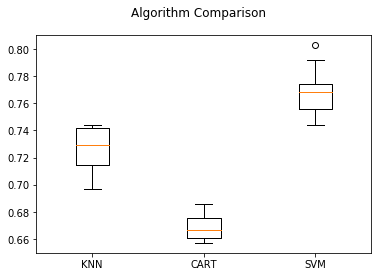

In [35]:
#Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

pyplot.show()

### Standardise dataset
##### Reference - project_classification_sonar.py (from Blackboard - online.ittralee.ie)

The following code section utilises sample code from a previous project, available on Blackboard. Research was done on this step, as it was unfamiliar to the author. The phase aims at attempting to standardise the dataset, removing much of the skew/imbalance and adding normalisation to the dataset.

- "Standardize features by removing the mean and scaling to unit variance"
- "Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)."
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [36]:
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [37]:
# Supress warnings
# A number of data conversion warnings appeared in this section and made using the notebook more difficult
# Ref - https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
import warnings
warnings.filterwarnings('ignore')

In [38]:
#Evaluate models

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = "{0}: {1}, ({2})" .format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledKNN: 0.7378833713321841, (0.022202033251757375)
ScaledCART: 0.6680698437413113, (0.012618885257785175)
ScaledSVM: 0.7750382768911379, (0.01760701493128428)


 Results in this step are only marningally better than the intial models.

##### This step was simiarly performed on Prediction #1, using the Installs feature, and results were marginally better in some cases, and poorer in others (SVM). It was decided to remove this step from the first prediction experiment, as it proved to be of little value.

### Final prediction results
#### Predictions were made on the orignial models

In [39]:
# Make predictions on the validation set
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

prediction = knn.predict(X_validation)

#accuracy
print(accuracy_score(Y_validation, prediction))

#confusion matrix
print(confusion_matrix(Y_validation, prediction))

#classification report
print(classification_report(Y_validation, prediction))

0.7306855277475517
[[   1    0    2   13    0]
 [   0    0    7   33    2]
 [   0    9   73  252    0]
 [   1    8  118 1264   10]
 [   0    0    1   39    5]]
             precision    recall  f1-score   support

          1       0.50      0.06      0.11        16
          2       0.00      0.00      0.00        42
          3       0.36      0.22      0.27       334
          4       0.79      0.90      0.84      1401
          5       0.29      0.11      0.16        45

avg / total       0.68      0.73      0.70      1838



In [40]:
# Make predictions on the validation set
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)

prediction = cart.predict(X_validation)

#accuracy
print(accuracy_score(Y_validation, prediction))

#confusion matrix
print(confusion_matrix(Y_validation, prediction))

#classification report
print(classification_report(Y_validation, prediction))

0.6735582154515778
[[   1    0    4   10    1]
 [   1    3   11   25    2]
 [   2   18  102  210    2]
 [   7   26  211 1128   29]
 [   0    1    6   34    4]]
             precision    recall  f1-score   support

          1       0.09      0.06      0.07        16
          2       0.06      0.07      0.07        42
          3       0.31      0.31      0.31       334
          4       0.80      0.81      0.80      1401
          5       0.11      0.09      0.10        45

avg / total       0.67      0.67      0.67      1838



In [41]:
# Make predictions on the validation set
svm = SVC()
svm.fit(X_train, Y_train)

prediction = svm.predict(X_validation)

#accuracy
print(accuracy_score(Y_validation, prediction))

#confusion matrix
print(confusion_matrix(Y_validation, prediction))

#classification report
print(classification_report(Y_validation, prediction))

0.7535364526659413
[[   0    0    0   16    0]
 [   0    0    2   40    0]
 [   0    0    4  330    0]
 [   0    1   19 1381    0]
 [   0    0    0   45    0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        16
          2       0.00      0.00      0.00        42
          3       0.16      0.01      0.02       334
          4       0.76      0.99      0.86      1401
          5       0.00      0.00      0.00        45

avg / total       0.61      0.75      0.66      1838



##### Next steps in this project could include applying these techniques to an iOS dataset. Due to time limitations and limited datasets available, this could not be possible in this phase. Adding a comparison between the two platforms would be a great next exploration step for the project.